In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#find adopted users from the user_engagement csv
user_engagement = pd.read_csv('takehome_user_engagement.csv')
print(user_engagement.head())
adopted = user_engagement.visited.groupby(user_engagement.user_id).count() > 3
print(adopted.head())

            time_stamp  user_id  visited
0  2014-04-22 03:53:30        1        1
1  2013-11-15 03:45:04        2        1
2  2013-11-29 03:45:04        2        1
3  2013-12-09 03:45:04        2        1
4  2013-12-25 03:45:04        2        1
user_id
1    False
2     True
3    False
4    False
5    False
Name: visited, dtype: bool


In [3]:
adopt_df = pd.DataFrame(adopted)
adopt_df.reset_index(drop=False, inplace=True)
adopt_df.columns = ['user_id', 'adopted']
adopt_df.head()

,user_id,adopted
0,1,False
1,2,True
2,3,False
3,4,False
4,5,False


In [4]:
user_num = list(range(1,12001))
#type(user_num)
un = pd.DataFrame(user_num)
un.columns = ['user_id']
adopted_df = un.merge(adopt_df, how='left', on='user_id')
adopted_df.fillna(False, inplace=True)
adopted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 2 columns):
user_id    12000 non-null int64
adopted    12000 non-null bool
dtypes: bool(1), int64(1)
memory usage: 199.2 KB


In [5]:
users = pd.read_csv('takehome_users.csv', index_col=None, dtype={'name':str, 'email':str, 'org_id':int}, parse_dates=['creation_time'], encoding='cp850')
users['adopted'] = adopted_df.adopted
users.head()


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False


In [6]:
users['edomain']=''

for i in range(len(users.email)):
    email = users.email[i].split('@')
    if email[1] in ['gmail.com', 'yahoo.com', 'jourrapide.com', 'cuvox.de', 'gustr.com', 'hotmail.com']:
        users.loc[i,'edomain'] = email[1]
    else:
        users.loc[i,'edomain'] = 'other'

#used the below commented code to explore domain names, set any garbage domains to 'other'
#users.object_id.groupby(users.edomain).count().sort_values(ascending=False)        
        
users.head()


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,edomain
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False,yahoo.com
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True,gustr.com
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False,gustr.com
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False,yahoo.com
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False,yahoo.com


In [7]:
#possible new features: invited by adopted user, invited other user, email domain, 
users.creation_source.unique()

array(['GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'PERSONAL_PROJECTS',
       'SIGNUP_GOOGLE_AUTH'], dtype=object)

In [8]:
#create column for whether user was invited by other user
users['invited_by_user'] = users.invited_by_user_id.isnull()
users.invited_by_user = users['invited_by_user'].apply(lambda x: not x)
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,edomain,invited_by_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False,yahoo.com,True
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True,gustr.com,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False,gustr.com,True
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False,yahoo.com,True
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False,yahoo.com,True


In [9]:
#create column for whether user was invited by other user
users['invited_by_user'] = users.invited_by_user_id.isnull()
users.invited_by_user = users['invited_by_user'].apply(lambda x: not x)
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,edomain,invited_by_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False,yahoo.com,True
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True,gustr.com,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False,gustr.com,True
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False,yahoo.com,True
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False,yahoo.com,True


In [10]:
users['invited_by_adopted_user'] = False
users.invited_by_user_id.fillna(0)

for i in range(len(users.object_id)):
    invitee = users.loc[i, 'invited_by_user_id']
    if invitee > 0:
        value = users.loc[invitee-1, 'adopted']
        users.loc[i, 'invited_by_adopted_user'] = value

users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,edomain,invited_by_user,invited_by_adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False,yahoo.com,True,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True,gustr.com,True,False
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False,gustr.com,True,True
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False,yahoo.com,True,True
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False,yahoo.com,True,True


In [11]:
users[users.object_id == 5240].adopted.values[0]

True

In [12]:
org_user_count = users.object_id.groupby(users.org_id).count().sort_values(ascending=False)
org_adopted_count = users.adopted.groupby(users.org_id).sum().sort_values(ascending=False)

In [13]:
orgs = pd.DataFrame({'users':org_user_count, 'adopted_users':org_adopted_count})
orgs['percent_adopted'] = orgs.adopted_users/orgs.users
orgs.tail()

,adopted_users,users,percent_adopted
org_id,,,
412,0.0,17,0.0000
413,4.0,16,0.2500
414,6.0,20,0.3000
415,7.0,16,0.4375
416,0.0,2,0.0000


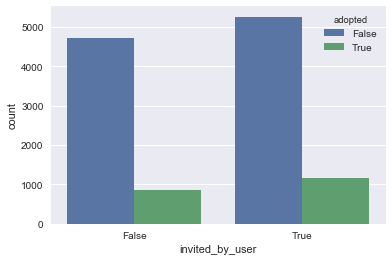

In [14]:
sns.countplot(x="invited_by_user", hue="adopted", data=users)
plt.show()

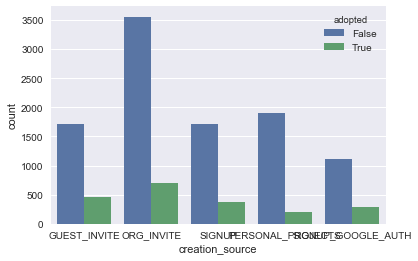

In [15]:
sns.countplot(x="creation_source", hue="adopted", data=users)
plt.show()

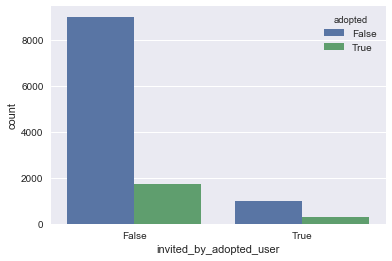

In [16]:
sns.countplot(x="invited_by_adopted_user", hue="adopted", data=users)
plt.show()

In [17]:
print('adoption rate:',round(users.adopted.sum()/len(users.adopted) * 100, 2),'%')

adoption rate: 16.73 %


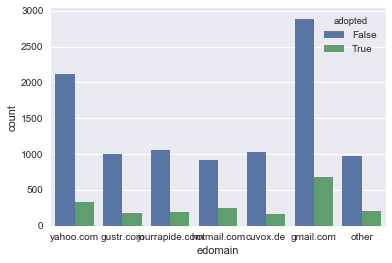

In [18]:
sns.countplot(x="edomain", hue="adopted", data=users)
plt.show()

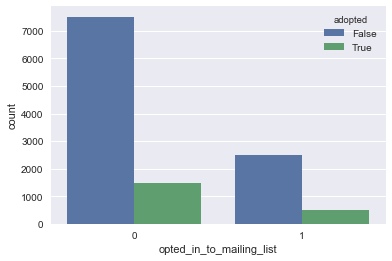

In [19]:
sns.countplot(x="opted_in_to_mailing_list", hue="adopted", data=users)
plt.show()

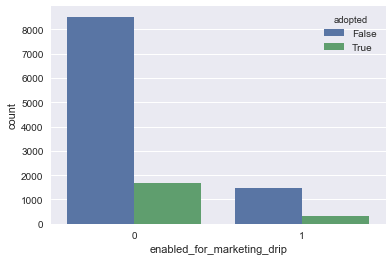

In [20]:
sns.countplot(x="enabled_for_marketing_drip", hue="adopted", data=users)
plt.show()

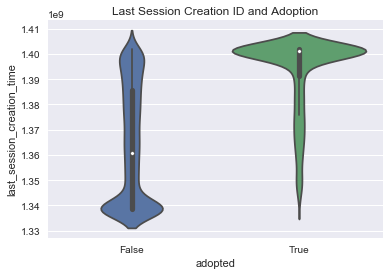

In [27]:
users.fillna(users.last_session_creation_time.min(), inplace=True)
sns.violinplot(y="last_session_creation_time", x="adopted", data=users)
plt.title('Last Session Creation ID and Adoption')
plt.show()

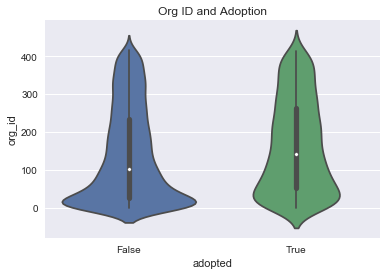

In [28]:
sns.violinplot(y="org_id", x="adopted", data=users)
plt.title('Org ID and Adoption')
plt.show()

In [23]:
users_y = users.adopted
users_features = users.drop(['object_id', 'creation_time', 'name', 'email', 'invited_by_user_id', 'adopted', 'invited_by_user'],1)
users_features = pd.get_dummies(users_features, drop_first=True)
users_features.head()

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_adopted_user,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,edomain_gmail.com,edomain_gustr.com,edomain_hotmail.com,edomain_jourrapide.com,edomain_other,edomain_yahoo.com
0,1.398139e+09,1,0,11,False,0,0,0,0,0,0,0,0,0,1
1,1.396238e+09,0,0,1,False,1,0,0,0,0,1,0,0,0,0
2,1.363735e+09,0,0,94,True,1,0,0,0,0,1,0,0,0,0
3,1.369210e+09,0,0,1,True,0,0,0,0,0,0,0,0,0,1
4,1.358850e+09,0,0,193,True,0,0,0,0,0,0,0,0,0,1


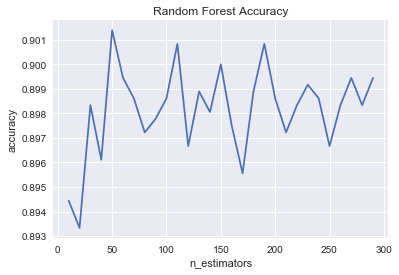

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

Xrf, Xtestrf, yrf, ytestrf = train_test_split(users_features.values, users_y.values, test_size=.3, random_state=42)
estimators = range(10, 300, 10)
accuracy = []
for i in estimators:
    rf = RandomForestClassifier(n_estimators = i)
    rf.fit(Xrf, yrf)
    accuracy.append(accuracy_score(rf.predict(Xtestrf), ytestrf))

plt.title('Random Forest Accuracy')
plt.ylabel('accuracy')
plt.xlabel('n_estimators')
plt.plot(estimators, accuracy)

In [40]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(Xrf, yrf)
y_pred = rf.predict(Xtestrf)
#print(X.columns)
print(accuracy_score(y_pred, ytestrf))
#print(rf.feature_importances_) 
confusion_matrix(ytestrf, y_pred)

0.9


array([[2894,  114],
       [ 246,  346]])

In [37]:
print(users_features.columns)
print(rf.feature_importances_)
#last session creation time and org ID are most important features

Index(['last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_adopted_user',
       'creation_source_ORG_INVITE', 'creation_source_PERSONAL_PROJECTS',
       'creation_source_SIGNUP', 'creation_source_SIGNUP_GOOGLE_AUTH',
       'edomain_gmail.com', 'edomain_gustr.com', 'edomain_hotmail.com',
       'edomain_jourrapide.com', 'edomain_other', 'edomain_yahoo.com'],
      dtype='object')
[ 0.66807853  0.01360206  0.01068206  0.2351585   0.00809257  0.01096381
  0.00684556  0.00800997  0.00300075  0.0064219   0.00574944  0.00581339
  0.0048203   0.00604442  0.00671673]


In [ ]:
#last_session_creation_time and org_id are most important features

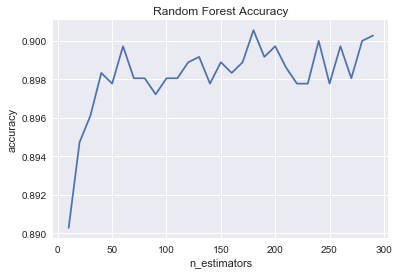

In [29]:
plt.title('Random Forest Accuracy')
plt.ylabel('accuracy')
plt.xlabel('n_estimators')
plt.plot(estimators, accuracy)